In [1]:
import numpy as np
from matplotlib import pyplot as plt
from photometry import *
#import settings_north as settings
import settings_south as settings

In [2]:
bricknames = settings.get_bricknames()
assert np.unique(bricknames).size == len(bricknames)

In [3]:
print(settings.randoms_fn)
randoms = TargetSelection.load_objects(settings.randoms_fn,radecbox=None,tracer='ELG',region=None)
randoms.set_upper_case()
print('Regions',np.unique(randoms['PHOTSYS']))
assert np.unique(bricknames).tolist() == np.unique(randoms['BRICKNAME']).tolist()
counts = []
for brickname in bricknames:
    counts.append(np.sum(randoms['BRICKNAME'] == brickname))
print('Number of randoms per brick:',np.min(counts),np.max(counts))
randoms.region = 'N' if settings.run == 'north' else 'S'
randoms.set_estimated_transmission(key='MW_TRANSMISSION')
randoms.set_estimated_flux(key='EFLUX',key_transmission='MW_TRANSMISSION',key_flux='FLUX')
mask = randoms.mask_ts(key_flux='EFLUX')
randoms.set_mag_from_flux(key_flux='EFLUX')
randoms['GR'] = randoms['G'] - randoms['R']
randoms['RZ'] = randoms['R'] - randoms['Z']
print((~mask).sum())

/global/cscratch1/sd/adematti/Obiwan/dr9/ebv1000/south/randoms/randoms.fits
Regions ['S']
Number of randoms per brick: 263 360
166100


Text(0, 0.5, '$r-z$')

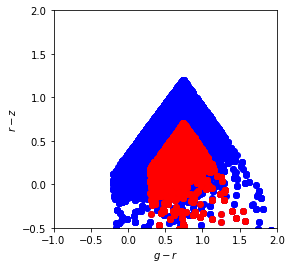

In [4]:
fig,ax = plt.subplots(ncols=1,nrows=1,sharex=False,sharey=False,figsize=(4,4))
ax.scatter(randoms['RZ'],randoms['GR'],color='b')
ax.scatter(randoms['RZ'][mask],randoms['GR'][mask],color='r')
ax.set_xlim(-1.,2.)
ax.set_ylim(-0.5,2.)
ax.set_xlabel('$g-r$')
ax.set_ylabel('$r-z$')

In [5]:
for field in ['G','GR','RZ']:
    print(field,randoms[field].min(),randoms[field][mask].min(),randoms[field].max(),randoms[field][mask].max())

G 19.50074658077523 20.036570603314647 23.89999598082776 23.399765012617777
GR -4.550731857353298 -4.550731857353298 1.2049505207924618 0.7019889568683553
RZ -0.19814661091939456 0.3005350498273316 2.0470866823610656 1.57642027944231


In [6]:
for field in randoms.fields:
    print(field,randoms[field].shape)

RELEASE (187632,)
BRICKID (187632,)
BRICKNAME (187632,)
BRICK_OBJID (187632,)
RA (187632,)
DEC (187632,)
NOBS_G (187632,)
NOBS_R (187632,)
NOBS_Z (187632,)
PSFDEPTH_G (187632,)
PSFDEPTH_R (187632,)
PSFDEPTH_Z (187632,)
GALDEPTH_G (187632,)
GALDEPTH_R (187632,)
GALDEPTH_Z (187632,)
PSFDEPTH_W1 (187632,)
PSFDEPTH_W2 (187632,)
PSFSIZE_G (187632,)
PSFSIZE_R (187632,)
PSFSIZE_Z (187632,)
APFLUX_G (187632,)
APFLUX_R (187632,)
APFLUX_Z (187632,)
APFLUX_IVAR_G (187632,)
APFLUX_IVAR_R (187632,)
APFLUX_IVAR_Z (187632,)
MASKBITS (187632,)
WISEMASK_W1 (187632,)
WISEMASK_W2 (187632,)
EBV (187632,)
PHOTSYS (187632,)
HPXPIXEL (187632,)
DESI_TARGET (187632,)
BGS_TARGET (187632,)
MWS_TARGET (187632,)
SUBPRIORITY (187632,)
OBSCONDITIONS (187632,)
PRIORITY_INIT (187632,)
NUMOBS_INIT (187632,)
SCND_TARGET (187632,)
NUMOBS_MORE (187632,)
NUMOBS (187632,)
Z (187632,)
ZWARN (187632,)
TARGET_STATE (187632,)
TIMESTAMP (187632,)
VERSION (187632,)
PRIORITY (187632,)
ID (187632,)
ID_TRUTH (187632,)
G (187632,)
R 